<a href="https://colab.research.google.com/github/HariniMS/COVID-19-Linear-Regression-machine-learning/blob/master/Black_Friday_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BLACK FRIDAY SALES PREDICTION**
# Cleaning and preparing the BLACK_FRIDAY dataset for model training

``` 
    
*   This data is E-commerce data.
*   people who have bought some kind of products , based on that we need to predict what is the purchase capacity of every customer, and this prediction later will help the company to give offer to customers againt diff products.

```



## A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. 
### They have shared purchase summary of various customers for selected high volume products from last month. 
### The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

### Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#importing the dataset 

df_train = pd.read_csv("/content/drive/MyDrive/CSV/Black_friday_train.csv")

In [ ]:
df_train.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [ ]:
df_train.shape

(550068, 12)

In [ ]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df_train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [ ]:
df_train.unique()

AttributeError: ignored

In [ ]:
df_train['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

## Whenever they give TRAIn & TEST dataset, combine both and do the data preprocessing.

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/CSV/Black_friday_test.csv")

In [ ]:
df_test.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0                 NaN  
4                 5.0                12.0

In [ ]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [ ]:
df_test.nunique()

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              17
Product_Category_3              15
dtype: int64

In [ ]:
df_train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

## Only PURCHASE column is in the TRAIN not in TEST

#Merge both TRAIN & TEST Data -- 3 methods
+ pd.merge() 
+ pd.concatenate()  
+ append()


In [ ]:
#merge both train & test 

df = df_train.append(df_test) #adding the TEST rows at the end of TRAIN 


df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [ ]:
df["Purchase"].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [ ]:
df.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  Purchase
1000001  P00000142   F       0-17   10          A              2                           0               3                   4.0                 5.0                 13650.0     1
1004018  P00127442   F       46-50  20          C              2                           1               1                   2.0                 15.0                7723.0      1
         P00032042   F       46-50  20          C              2                           1               1                   2.0                 15.0                12024.0     1
         P00034042   F       46-50  20          C              2                           1               1                   2.0                 16.0                15653.0     1
         P00034442   F       46-50  20          C              2                           1        

In [ ]:
#basic

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  7.836670e+05  783667.000000   783667.000000       783667.000000   
mean   1.003029e+06       8.079300        0.409777            5.366196   
std    1.727267e+03       6.522206        0.491793            3.878160   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001519e+06       2.000000        0.000000            1.000000   
50%    1.003075e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       537685.000000       237858.000000  550068.000000  
mean             9.844506           12.668605    9263.968713  
std              5.089093            4.125510    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [ ]:
#useless column dropping 

df.drop(["User_ID"], axis=1, inplace=True)

In [ ]:
df.head()

Product_ID Gender   Age  Occupation City_Category  \
0  P00069042      F  0-17          10             A   
1  P00248942      F  0-17          10             A   
2  P00087842      F  0-17          10             A   
3  P00085442      F  0-17          10             A   
4  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

## Handling Categorical Feature :

# 1. Gender

In [ ]:
pd.get_dummies(df["Gender"])

F  M
0       1  0
1       1  0
2       1  0
3       1  0
4       0  1
...    .. ..
233594  1  0
233595  1  0
233596  1  0
233597  1  0
233598  1  0

[783667 rows x 2 columns]

In [ ]:
pd.get_dummies(df["Gender"], drop_first=1) #created M column, but we need only AGE name as column

M
0       0
1       0
2       0
3       0
4       1
...    ..
233594  0
233595  0
233596  0
233597  0
233598  0

[783667 rows x 1 columns]

In [ ]:
#Converting F to 0 ans M to 1

df["Gender"] = df["Gender"].map({ "F" : 0,
                                  "M" : 1 })

In [ ]:
df["Gender"]

0         0
1         0
2         0
3         0
4         1
         ..
233594    0
233595    0
233596    0
233597    0
233598    0
Name: Gender, Length: 783667, dtype: int64

In [ ]:
df.head()

Product_ID  Gender   Age  Occupation City_Category  \
0  P00069042       0  0-17          10             A   
1  P00248942       0  0-17          10             A   
2  P00087842       0  0-17          10             A   
3  P00085442       0  0-17          10             A   
4  P00285442       1   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

# 2. Age

In [ ]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
pd.get_dummies(df["Age"])

0-17  18-25  26-35  36-45  46-50  51-55  55+
0          1      0      0      0      0      0    0
1          1      0      0      0      0      0    0
2          1      0      0      0      0      0    0
3          1      0      0      0      0      0    0
4          0      0      0      0      0      0    1
...      ...    ...    ...    ...    ...    ...  ...
233594     0      0      1      0      0      0    0
233595     0      0      1      0      0      0    0
233596     0      0      1      0      0      0    0
233597     0      0      0      0      1      0    0
233598     0      0      0      0      1      0    0

[783667 rows x 7 columns]

In [ ]:
pd.get_dummies(df["Age"],drop_first=True)

18-25  26-35  36-45  46-50  51-55  55+
0           0      0      0      0      0    0
1           0      0      0      0      0    0
2           0      0      0      0      0    0
3           0      0      0      0      0    0
4           0      0      0      0      0    1
...       ...    ...    ...    ...    ...  ...
233594      0      1      0      0      0    0
233595      0      1      0      0      0    0
233596      0      1      0      0      0    0
233597      0      0      0      1      0    0
233598      0      0      0      1      0    0

[783667 rows x 6 columns]

In [ ]:
#Method-1: Target ordinal encoding 
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [ ]:
df.Age.unique()

array([1, 7, 3, 5, 6, 4, 2])

In [ ]:
df["Age"].value_counts()

3    313015
4    156724
2    141953
5     65278
6     54784
7     30579
1     21334
Name: Age, dtype: int64

In [ ]:
#Method-2 : Label encoding (not recommended to this case)

from sklearn import preprocessing 

le = preprocessing.LabelEncoder()

df["Age"] = le.fit_transform(df["Age"]) #train or Test data use only TRANSform not fit_transform.

df["Age"].unique()

array([0, 6, 2, 4, 5, 3, 1])

#3. CITY CATEGORY

In [ ]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
pd.get_dummies(df["City_Category"], drop_first=True)

B  C
0       0  0
1       0  0
2       0  0
3       0  0
4       0  1
...    .. ..
233594  1  0
233595  1  0
233596  1  0
233597  0  1
233598  1  0

[783667 rows x 2 columns]

In [ ]:
df["City_Category"] =  pd.get_dummies(df["City_Category"], drop_first=True)

ValueError: ignored

In [ ]:
df_city =  pd.get_dummies(df["City_Category"], drop_first=True)

In [ ]:
df_city.head()

B  C
0  0  0
1  0  0
2  0  0
3  0  0
4  0  1

In [ ]:
df_city.unique()

AttributeError: ignored

In [ ]:
df_city.value_counts()

B  C
1  0    329739
0  1    243684
   0    210244
dtype: int64

In [ ]:
df_city

B  C
0       0  0
1       0  0
2       0  0
3       0  0
4       0  1
...    .. ..
233594  1  0
233595  1  0
233596  1  0
233597  0  1
233598  1  0

[783667 rows x 2 columns]

In [ ]:
#merging with df

pd.concat(df, df_city)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

In [ ]:
df = pd.concat([df, df_city], axis = 1) #df_city adds at the end of the columns , always give axis=1 when concatenating 

df.head()

Product_ID  Gender  Age  Occupation City_Category  \
0  P00069042       0    1          10             A   
1  P00248942       0    1          10             A   
2  P00087842       0    1          10             A   
3  P00085442       0    1          10             A   
4  P00285442       1    7          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  B  C  
0                 NaN                 NaN    8370.0  0  0  
1                 6.0                14.0   15200.0  0  0  
2                 NaN                 NaN    1422.0  0  0  
3                14.0                 NaN    1057.0  0  0  
4                 NaN                 NaN    7969.0  0  1

In [ ]:
#dropping City_category

df.drop(df["City_Category"],axis=1, inplace=True)

KeyError: ignored

In [ ]:
df.drop("City_Category" ,axis=1, inplace=True)

In [ ]:
df.head()

Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  P00069042       0    1          10                          2   
1  P00248942       0    1          10                          2   
2  P00087842       0    1          10                          2   
3  P00085442       0    1          10                          2   
4  P00285442       1    7          16                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  B  C  
0    8370.0  0  0  
1   15200.0  0  0  
2    1422.0  0  0  
3    1057.0  0  0  
4    7969.0  0  1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


#checking Missing values

In [ ]:
df.isnull().sum() #Purchase- missing values are from test dataset

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

#Replacing Missing Values for Product_Category_2 and Product_Category_3

In [ ]:
 df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
 df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [ ]:
 df["Product_Category_2"].dtype #discrete value(float), so use MODE

dtype('float64')

In [ ]:
#replacing discrete data with mode

df["Product_Category_2"].mode()

0    8.0
dtype: float64

In [ ]:
df["Product_Category_2"].mode()[0]

8.0

In [ ]:
# df["Product_Category_2"].median()

9.0

In [ ]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [ ]:
df["Product_Category_2"].isnull().sum()

0

# replacing missing values- "Product_Category_3"

In [ ]:
df["Product_Category_3"].isnull().sum()

545809

In [ ]:
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
df["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [ ]:
df["Product_Category_3"].mode()

0    16.0
dtype: float64

In [ ]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [ ]:
df["Product_Category_2"].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [ ]:
df["Product_Category_3"].isnull().sum()

0

In [ ]:
df.head()

Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  P00069042       0    1          10                          2   
1  P00248942       0    1          10                          2   
2  P00087842       0    1          10                          2   
3  P00085442       0    1          10                          2   
4  P00285442       1    7          16                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 8.0                16.0   
1               0                   1                 6.0                14.0   
2               0                  12                 8.0                16.0   
3               0                  12                14.0                16.0   
4               0                   8                 8.0                16.0   

   Purchase  B  C  
0    8370.0  0  0  
1   15200.0  0  0  
2    1422.0  0  0  
3    1057.0  0  0  
4    7969.0  0  1

In [ ]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace('+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [ ]:
df.head()

Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  P00069042       0    1          10                          2   
1  P00248942       0    1          10                          2   
2  P00087842       0    1          10                          2   
3  P00085442       0    1          10                          2   
4  P00285442       1    7          16                          4   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 8.0                16.0   
1               0                   1                 6.0                14.0   
2               0                  12                 8.0                16.0   
3               0                  12                14.0                16.0   
4               0                   8                 8.0                16.0   

   Purchase  B  C  
0    8370.0  0  0  
1   15200.0  0  0  
2    1422.0  0  0  
3    1057.0  0  0  
4    7969.0  0  1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


## convert object to integer - "Stay_In_Current_City_Years"

In [ ]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype(int)

In [ ]:
df["Stay_In_Current_City_Years"]

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: int64

In [ ]:
df["Stay_In_Current_City_Years"].dtype

dtype('int64')

In [ ]:
df["B"] = df["B"].astype(int) # uint8 datatype-  change to int

In [ ]:
df["C"] = df["C"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


# Visualization

## Seaborn -barplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


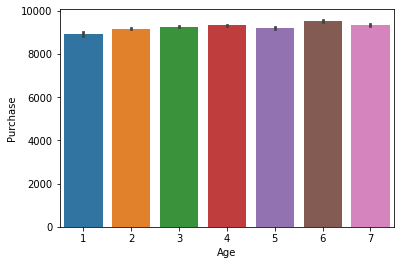

In [ ]:
import seaborn as sns

sns.barplot('Age','Purchase', data=df) #who have purhased more or less 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


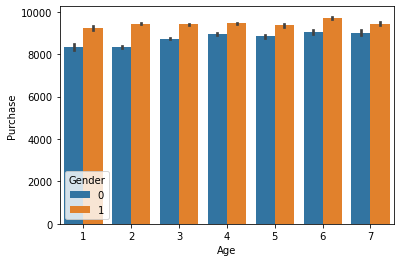

In [ ]:
#Age VS Purchase VISUALISATION

sns.barplot('Age','Purchase',hue='Gender',data=df)

FRom the above graph, Male(Gender=1) with Age =6(51-55 age) has done huge purchase than Female 

OR

Purchasing of goods male over female is high 

OR

Purchasing of men is high


In [ ]:
sns.barplot(['Age','Purchase'], data=df) # don't use []

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

## PURCHASE VS OCCUPATION- VISUALISATION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


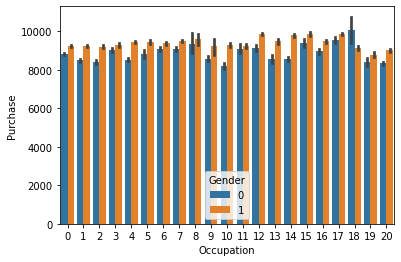

In [ ]:
sns.barplot('Occupation','Purchase', hue="Gender", data=df)

20 different occupations, 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


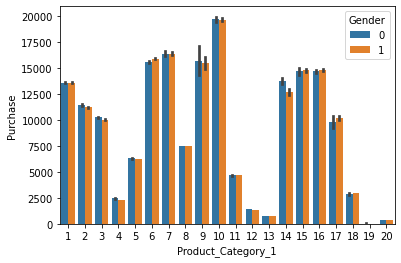

In [ ]:
sns.barplot('Product_Category_1','Purchase', hue="Gender", data=df) #how many ppl bought category_1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


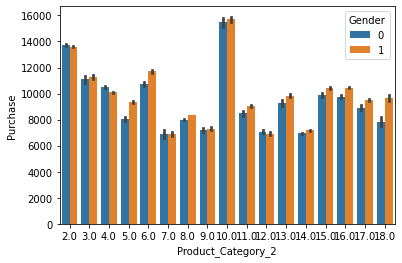

In [ ]:
sns.barplot('Product_Category_2','Purchase', hue="Gender", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


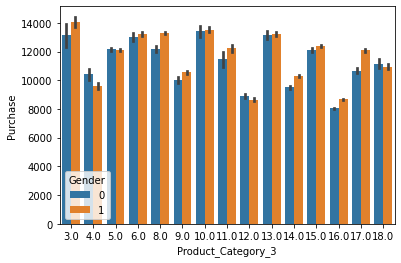

In [ ]:
sns.barplot('Product_Category_3','Purchase', hue="Gender", data=df)

From above graphs, PRODUCT_CATEGORY_1 has bought the most (20,000) or sold the most

In [ ]:
#dividing null and non-null values

df['Purchase'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
233594     True
233595     True
233596     True
233597     True
233598     True
Name: Purchase, Length: 783667, dtype: bool

In [ ]:
~df['Purchase'].isnull()

0          True
1          True
2          True
3          True
4          True
          ...  
233594    False
233595    False
233596    False
233597    False
233598    False
Name: Purchase, Length: 783667, dtype: bool

In [ ]:
df[df['Purchase'].isnull()] #nan values

Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0       P00128942       1    5           7                           2   
1       P00113442       1    3          17                           0   
2       P00288442       0    4           1                           4   
3       P00145342       0    4           1                           4   
4       P00053842       0    3           1                           1   
...           ...     ...  ...         ...                         ...   
233594  P00118942       0    3          15                           4   
233595  P00254642       0    3          15                           4   
233596  P00031842       0    3          15                           4   
233597  P00124742       0    5           1                           4   
233598  P00316642       0    5           0                           4   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    1                   1                11.0   
1                    0                   3                 5.0   
2                    1                   5                14.0   
3                    1                   4                 9.0   
4                    0                   4                 5.0   
...                ...                 ...                 ...   
233594               1                   8                 8.0   
233595               1                   5                 8.0   
233596               1                   1                 5.0   
233597               0                  10                16.0   
233598               1                   4                 5.0   

        Product_Category_3  Purchase  B  C  
0                     16.0       NaN  1  0  
1                     16.0       NaN  0  1  
2                     16.0       NaN  1  0  
3                     16.0       NaN  1  0  
4                     12.0       NaN  0  1  
...                    ...       ... .. ..  
233594                16.0       NaN  1  0  
233595                16.0       NaN  1  0  
233596                12.0       NaN  1  0  
233597                16.0       NaN  0  1  
233598                16.0       NaN  1  0  

[233599 rows x 12 columns]

In [ ]:
df[~df['Purchase'].isnull()] 

Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0       P00069042       0    1          10                           2   
1       P00248942       0    1          10                           2   
2       P00087842       0    1          10                           2   
3       P00085442       0    1          10                           2   
4       P00285442       1    7          16                           4   
...           ...     ...  ...         ...                         ...   
550063  P00372445       1    6          13                           1   
550064  P00375436       0    3           1                           3   
550065  P00375436       0    3          15                           4   
550066  P00375436       0    7           1                           2   
550067  P00371644       0    5           0                           4   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    0                   3                 8.0   
1                    0                   1                 6.0   
2                    0                  12                 8.0   
3                    0                  12                14.0   
4                    0                   8                 8.0   
...                ...                 ...                 ...   
550063               1                  20                 8.0   
550064               0                  20                 8.0   
550065               1                  20                 8.0   
550066               0                  20                 8.0   
550067               1                  20                 8.0   

        Product_Category_3  Purchase  B  C  
0                     16.0    8370.0  0  0  
1                     14.0   15200.0  0  0  
2                     16.0    1422.0  0  0  
3                     16.0    1057.0  0  0  
4                     16.0    7969.0  0  1  
...                    ...       ... .. ..  
550063                16.0     368.0  1  0  
550064                16.0     371.0  0  1  
550065                16.0     137.0  1  0  
550066                16.0     365.0  0  1  
550067                16.0     490.0  1  0  

[550068 rows x 12 columns]

In [ ]:
#dividing null and non-null values

df_train = df[~df['Purchase'].isnull()] 

df_test = df[df['Purchase'].isnull()] 

In [ ]:
df_train.shape

(550068, 12)

In [ ]:
df_test.shape

(233599, 12)

In [ ]:
# taking only df_train

df_train.head()

Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0  P00069042       0    1          10                           2   
1  P00248942       0    1          10                           2   
2  P00087842       0    1          10                           2   
3  P00085442       0    1          10                           2   
4  P00285442       1    7          16                           4   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 8.0                16.0   
1               0                   1                 6.0                14.0   
2               0                  12                 8.0                16.0   
3               0                  12                14.0                16.0   
4               0                   8                 8.0                16.0   

   Purchase  B  C  
0    8370.0  0  0  
1   15200.0  0  0  
2    1422.0  0  0  
3    1057.0  0  0  
4    7969.0  0  1

In [ ]:
x = df_train.drop('Purchase', axis = 1)
x.head()

Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0  P00069042       0    1          10                           2   
1  P00248942       0    1          10                           2   
2  P00087842       0    1          10                           2   
3  P00085442       0    1          10                           2   
4  P00285442       1    7          16                           4   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 8.0                16.0   
1               0                   1                 6.0                14.0   
2               0                  12                 8.0                16.0   
3               0                  12                14.0                16.0   
4               0                   8                 8.0                16.0   

   B  C  
0  0  0  
1  0  0  
2  0  0  
3  0  0  
4  0  1

In [ ]:
y = df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [ ]:
x.shape

(550068, 11)

In [ ]:
y.shape

(550068,)

In [ ]:
x=x.drop('Product_ID', axis =1)

In [ ]:
x.head()

Gender  Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0       0    1          10                           2               0   
1       0    1          10                           2               0   
2       0    1          10                           2               0   
3       0    1          10                           2               0   
4       1    7          16                           4               0   

   Product_Category_1  Product_Category_2  Product_Category_3  B  C  
0                   3                 8.0                16.0  0  0  
1                   1                 6.0                14.0  0  0  
2                  12                 8.0                16.0  0  0  
3                  12                14.0                16.0  0  0  
4                   8                 8.0                16.0  0  1

In [ ]:
x.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'B', 'C'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)


In [ ]:
x_train.shape

(368545, 10)

In [ ]:
x_train.head()

Gender  Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
396876       1    2          14                           3               0   
433826       1    6           0                           0               1   
516298       1    4          17                           0               0   
193380       1    3           4                           1               0   
273542       0    4          20                           3               1   

        Product_Category_1  Product_Category_2  Product_Category_3  B  C  
396876                   1                 2.0                16.0  1  0  
433826                   8                16.0                16.0  0  0  
516298                   3                 4.0                12.0  0  1  
193380                   8                16.0                16.0  1  0  
273542                   3                 4.0                12.0  1  0

In [ ]:
x_test.shape

(181523, 10)

In [ ]:
y_train.shape

(368545,)

In [ ]:
y_train.head()

396876    19307.0
433826     7859.0
516298    10718.0
193380     9823.0
273542    13702.0
Name: Purchase, dtype: float64

#Feature scaling :

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train

array([[ 0.57141282, -1.10505734,  0.90867822, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 0.57141282,  1.84716932, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       [ 0.57141282,  0.37105599,  1.36872445, ..., -1.09182956,
        -0.85056064,  1.48627336],
       ...,
       [-1.75004823, -1.10505734, -1.08485545, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064, -0.67282374]])

In [ ]:
x_train.shape

(368545, 10)